### Introduction:
Knowing how to study effectively and efficiently is the key to success for many university students. Therefore, our initial research question was: Given degree of study time for goal object materials (STG), degree of repetition (SCG), degree of study time of user for related objects (STR), exam performance of user for related objects (LPR), and exam performance of user for goal objects (PEG),  what would be the overall knowledge level of the user (UNS)? However, after further analysis (which will be explained below), we have altered our research question: Given exam performance of user for related objects (LPR), and exam performance of user for goal objects (PEG),  what would be the overall knowledge level of the user (UNS)? The dataset that we will be using to answer this question is called User Knowledge (retrieved from https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling). The User Knowledge Modeling Data Set classifies the overall knowledge level of a user into 4 categories: Very Low, Low, Middle, High. 

### Methods:
In our preliminary work, we downloaded the file from the web using a URL so that it was reproducible and read the data file. Then, we noticed that the dataset had some extra info (describing the data set), so we selected to leave that out. As seen from table number 5, there was no class imbalance therefore we did not need to do oversampling. Additionally, we felt that all predictors were equally important, so we initially decided to use all 5 to predict UNS (although this changed with further analysis- will be explained below). We selected the columns STG:UNS (this includes the predictors of STG, SCG, STR, LPR, PEG, and the class which we would like to predict, UNS). The dataset required minimal cleaning as it was already given in a relatively tidy format (each row has a single observation, each column is a single variable, and each value is a single cell- other than the extra info section), we just removed a few rows which did not contain actual data.


In [14]:
library(tidyverse) # to perform operations on the data set
library(repr) # to set graph plot size and performing some operations on data set
library(GGally) # to make graph using ggpairs() 
library(tidymodels)
library(readxl) # to read the data set into R
set.seed(2020) # to make the data reproducible

This data set is a file with multiple sheets, and we only used sheet 2 (training set-consisting of 258 rows) and sheet 3 (testing set consisting of 145 rows). Both had no rows having missing data. For our proposal submission, we used these two sets as given to us by the dataset, however we later ran into problems in the analysis. The given testing and training set had slightly different UNS subcategories, where the training set had categories “High”, “Medium”, “Low” and “very_low” whereas the testing set had a “Very Low” category instead. The difference between the space and underscore (and the capital letters) for the very low category in these two tests made it difficult to conduct any further analysis, as jupyter was interpreting these to be two different categories. This caused an issue in our work, and we essentially had to start over. Therefore, we decided to set the seed (using set.seed(2000)) at the very beginning of our file to make the data reproducible, bind the testing and training set (using rbind) and created a 70-30 split of the total. When we obtained our training set, we mutated it so that every “very_low” would now show up as “Very Low”, therefore solving our problem from before. 


In [15]:
#Reading the training data set from the Web into R and cleaning it
user_data_training <- download.file(url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls", destfile = "user_data.xls")
user_data_training <- read_excel("user_data.xls", sheet = 2)
  
user_data_training$UNS[user_data_training$UNS == "very_low"] <- "Very Low" #Setting the "very_low field to Very Low to match with Test set"

user_data_training <- select(user_data_training, STG:UNS) %>% #Selecting only the required columns (not including metadata)
                      mutate(UNS = as_factor(UNS)) #Mutating the column to be predicted to be of type factor

print("Table Number: 1")
user_data_training

New names:
* `` -> ...7
* `` -> ...8



[1] "Table Number: 1"


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.000,0.00,0.00,0.00,Very Low
0.08,0.080,0.10,0.24,0.90,High
0.06,0.060,0.05,0.25,0.33,Low
0.10,0.100,0.15,0.65,0.30,Middle
0.08,0.080,0.08,0.98,0.24,Low
0.09,0.150,0.40,0.10,0.66,Middle
0.10,0.100,0.43,0.29,0.56,Middle
0.15,0.020,0.34,0.40,0.01,Very Low
0.20,0.140,0.35,0.72,0.25,Low


In [16]:
#Reading the testing data set from the Web into R and cleaning it
user_data_test <- read_excel("user_data.xls", sheet = 3)
user_data_test <- select(user_data_test, STG:UNS) %>%  #Selecting only the required columns (not including metadata)
                  mutate(UNS = as_factor(UNS)) #Mutating the column to be predicted to be of type factor
print("Table Number: 2")
user_data_test

New names:
* `` -> ...7
* `` -> ...8



[1] "Table Number: 2"


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
0.20,0.20,0.68,0.67,0.85,High
0.22,0.22,0.90,0.30,0.90,High
0.14,0.14,0.70,0.50,0.30,Low
0.16,0.16,0.80,0.50,0.50,Middle
0.12,0.12,0.75,0.68,0.15,Low
0.20,0.20,0.88,0.77,0.80,High


In [17]:
#Combining both user and test data sets (they have been taken from separate excel sheets) and then doing a 70-30 split to form our 
#training and tets data sets 
#robk@statmethods.net, Robert Kabacoff -. “Merging Data.” Quick-R: Merging, www.statmethods.net/management/merging.html.
total <- rbind(user_data_training, user_data_test) %>% #binidng rows in both the data frames using rbind
         mutate(UNS = as_factor(UNS)) # mutating UNS column to be of type factor since that column needs to be predicted

total_split <- initial_split(total, prop = 0.7, strata = UNS) #doing the decided 70-30 split of our combined data set
user_data_training <- training(total_split)
user_data_test <- testing(total_split)

In [18]:
#Counting the total number of rows in training data set
training_count <- count(user_data_training) 
print("Table Number: 3")
training_count

#Counting the total number of rows in test data set
test_count <- count(user_data_test) 
print("Table Number: 4")
test_count

[1] "Table Number: 3"


n
<int>
284


[1] "Table Number: 4"


n
<int>
119


After creating our split, it was found that there were 284 rows in the training set (Table number 3) and 119 rows in the testing set (Table number: 4). 

In [19]:
#Counting the total number of observations of each class (training data set) to check for class imbalance (if any)
user_data_summarize <- user_data_training %>%
                       group_by(UNS) %>%
                       summarize(Number_Of_Observations = n())
print("Table Number: 5")
user_data_summarize

`summarise()` ungrouping output (override with `.groups` argument)



[1] "Table Number: 5"


UNS,Number_Of_Observations
<fct>,<int>
Very Low,35
High,72
Low,91
Middle,86


We inspected the training set by counting the total number of observations in each class (using group_by and summarize). We see no major class imbalance and hence decide not to do over-sampling (Table Number: 5).

In [20]:
# Using map_df to calculate mean of each of our predictor variables and return the result as a dataframe
user_data_mean <- select(user_data_training, STG:PEG) %>% 
                  map_df(mean)
print("Table Number: 6")
user_data_mean

[1] "Table Number: 6"


STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.361493,0.359669,0.4532923,0.4261972,0.4632746


We used map_df to calculate the mean of each predictor variables and return the result as a dataframe (Table Number: 6). 

Then, we plotted each predictor variable against UNS- using the training data (yielding 5 different bar graphs with UNS on the x-axis and the predictor value on the y-axis). It did not give us much information as there were no qualities which made a singular plot stand out from any of the others, as they all looked relatively similar. For this reason, we used the ggpairs function to produce a plot matrix which consists of scatterplots and density plots for each variable combination (all combinations of the possible predictor variables) to give us more information.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



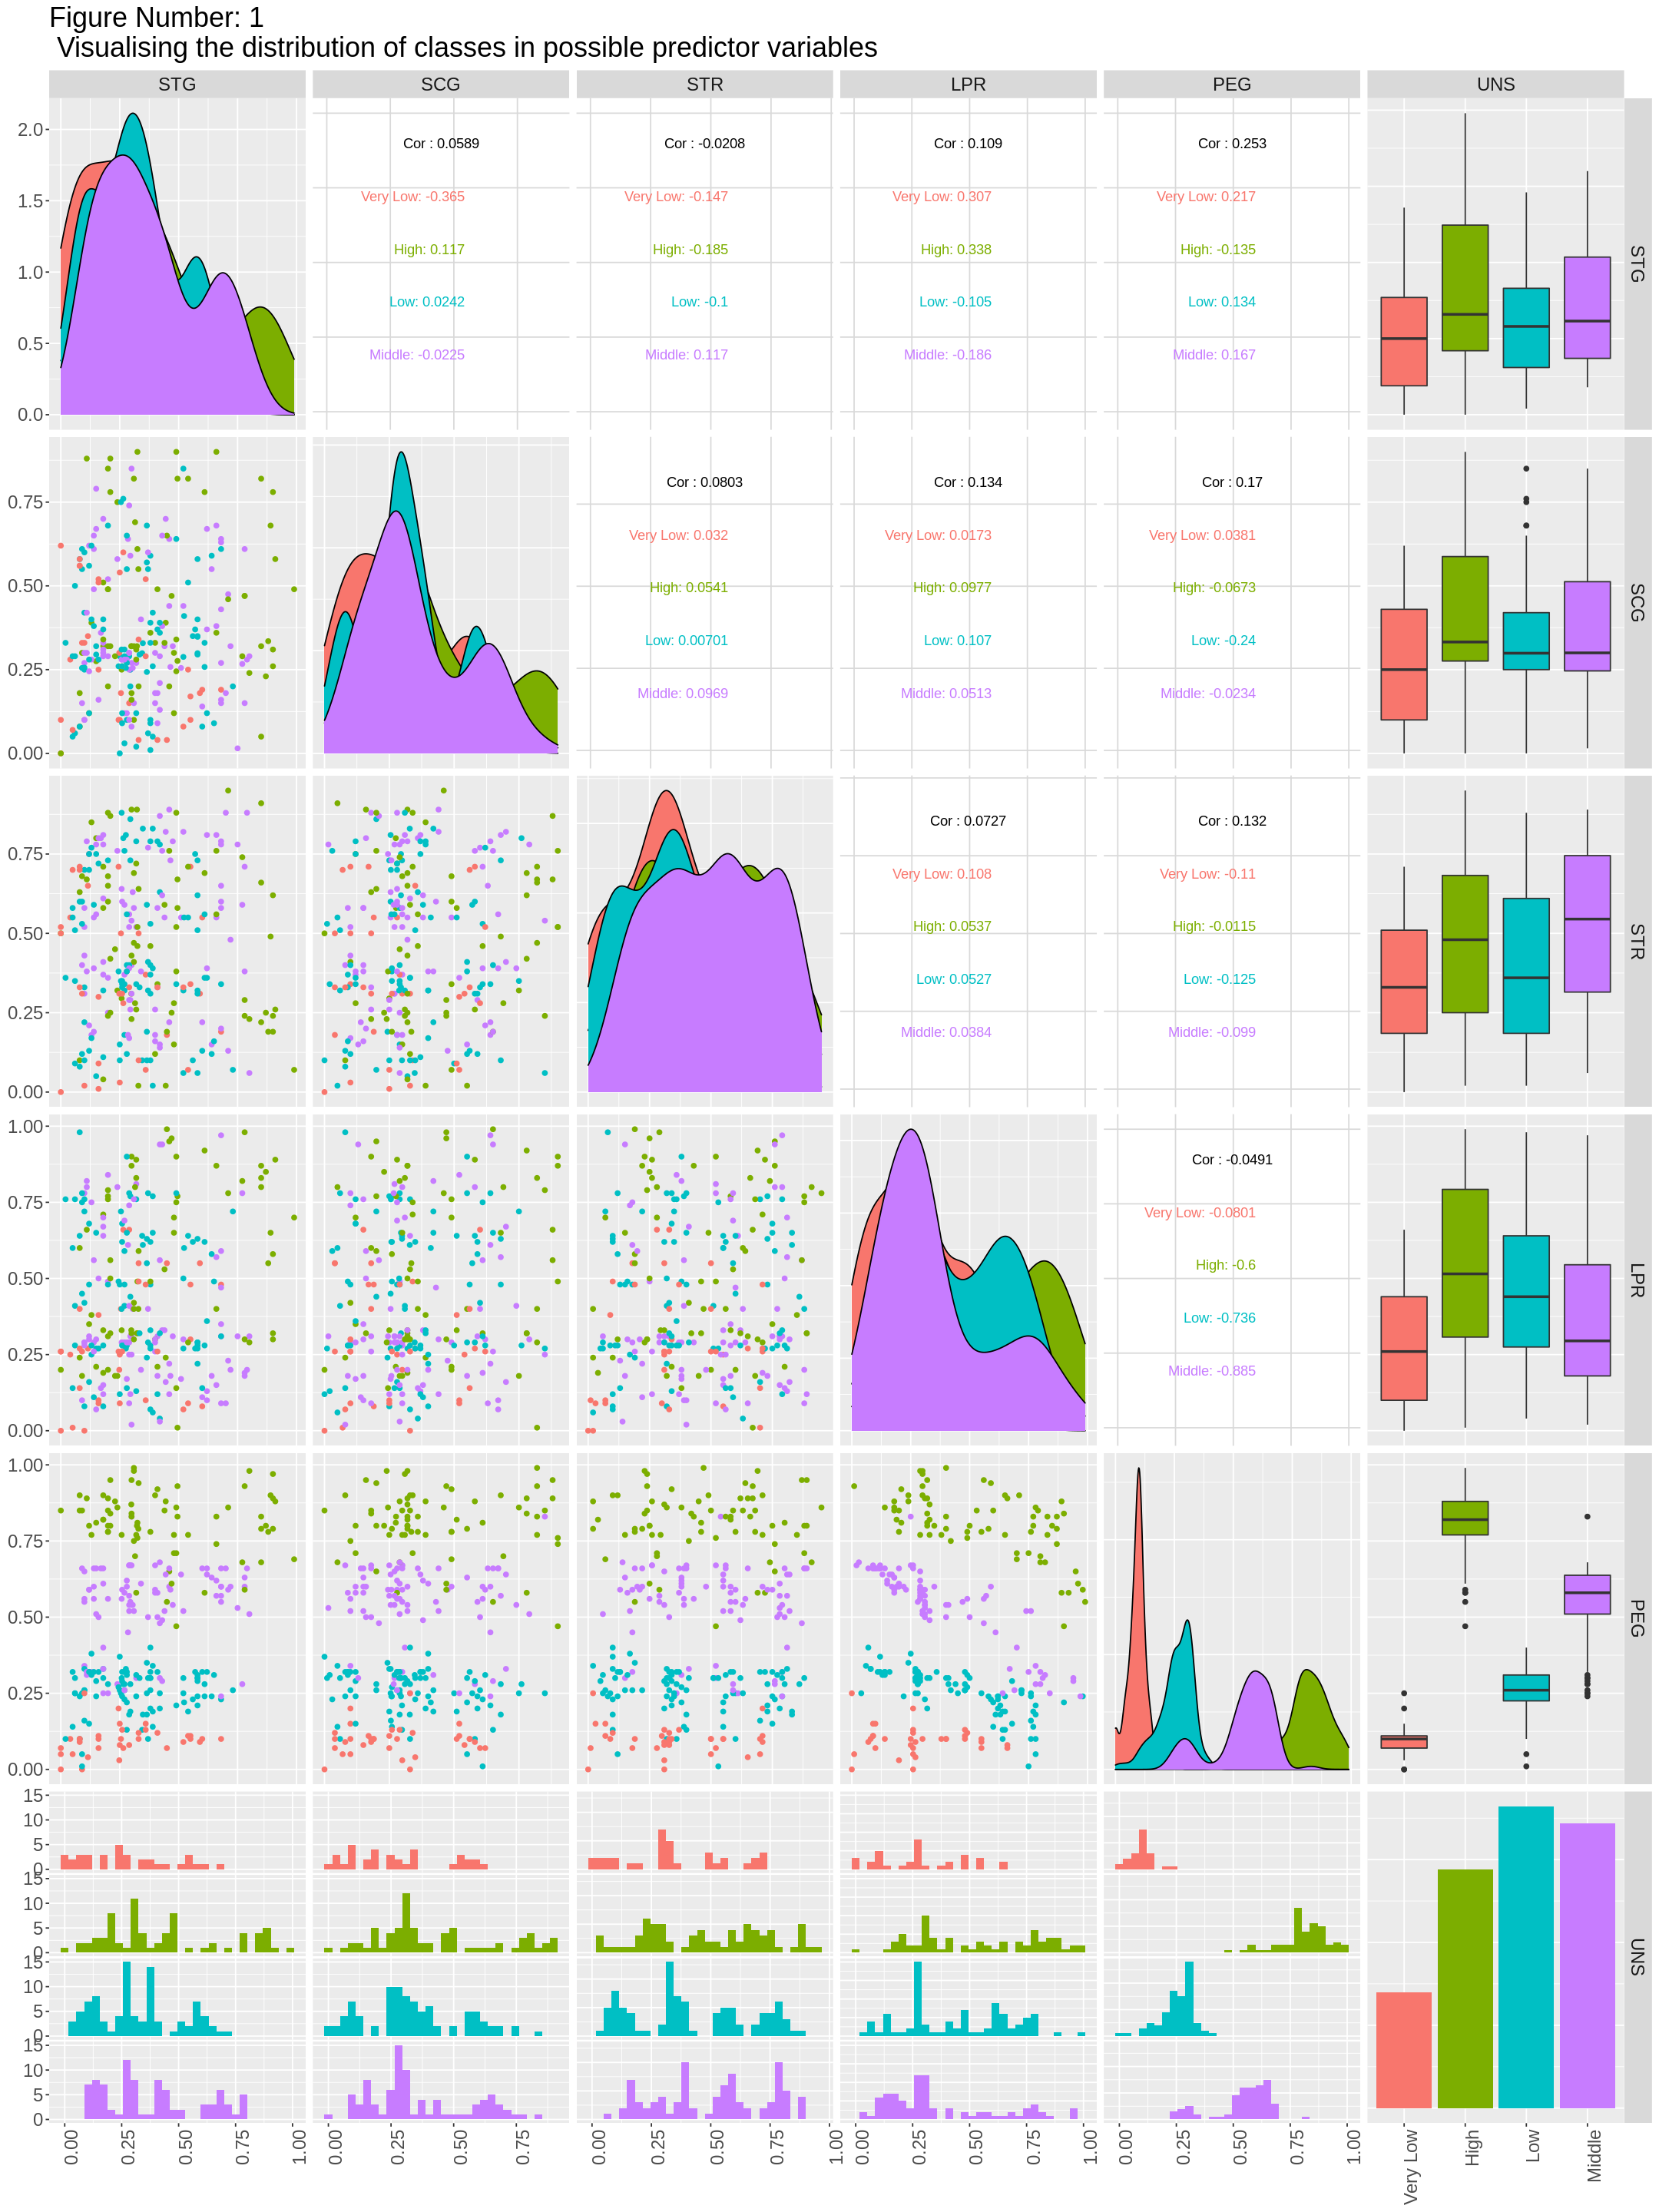

In [71]:
options(repr.plot.width = 18, repr.plot.height = 24)

#Since we have 5 predictor variables, we use ggpairs() to visualise the relationship between our classes and the predictor variables
paired_plot <- user_data_training %>%
               ggpairs(aes(color = UNS)) + #colouring the data points by the UNS column (which conatins the classes to be predicted)
               ggtitle("Figure Number: 1 \n Visualising the distribution of classes in possible predictor variables") +
               theme(text = element_text(size = 18)) +
               theme(axis.text.x = element_text(angle = 90, hjust = 1)) # adjusting the x-axis labels so they don't overlap wiht each other and are clearly visible

paired_plot

In the returned matrix (Figure Number: 1), we noticed the density and scatter plots when LPR and PEG variables were plotted, and observed that it gave a very nice separation between each UNS class as all the colors were clearly visible and distinguishable from each  other with some space between each cluster of dots and separation between each peak of a density plot. Other scatterplots were all over the place with each of the colors being scattered with no discernible order. The density plots also overlapped a lot for the other variables. However, the LPR vs PEG plot showed a noticeable separation for each of the classes. Although we initially planned to use all variables to predict the class, after analyzing the matrix, we went ahead with using just LPR and PEG to predict the class. 


Our next step was to begin the actual analysis of our data. Since we have a classification question, we used K nearest neighbors classification to achieve this. We built our model based on the training set and we used two predictors, LPR and PEG, to predict the class of UNS. First, we created a recipe, specifying the data to be user_data_training. In the recipe, we specified that the class of UNS would be predicted by LPR and PEG (UNS ~ LPR + PEG). Additionally, we did not center or scale any of our predictors since they were already in the range 0.0 to 1.0 (or we can say that they are all the same units).  When scaling is performed, the value/meaning behind the data is lost. It was important for us to keep the meaning behind our data, and scaling was not required, so we decided that not scaling this data would be best.  
Then, we created our user_model (commonly referred to as knn_spec in class), in which we use the weight function as rectangular, as  by setting it to "rectangular", each of the 
K - nearest neighbors gets exactly 1 vote as described above. Because we were using the straight-line distance between points, we set the engine as “kknn” (K-nearest neighbors), and we set the mode as classification (as we are predicting a class rather than a numerical value). Additionally, we did not have a specific k-value to set it to (yet), as our next step was to do cross-validation to determine the k-value which outputs the highest level of accuracy. For this reason, we set neighbors = tune( ) in our model.The tune is used to set the ideal number of neighbors, i.e. k value, the k value that will give us the maximum accuracy.
Then, we set up our cross validation, choosing 5 folds (v=5) (we don't choose a higher 'v' value to limit our computation time). We do cross-validation to try to get an optimal 'k' value.
We created a tibble as we need to create a data frame with the neighbors variable containing values from 1 to 50 (stepping by 1) using the seq function. Then we pass that data frame to the grid argument of tune_grid.  Then, we put all of this through workflow, and then used collect metrics, which we use after adding a recipe and a model, after which we use the fit function to fit the workflow on the data. Finally, we plotted our cross validation plot, which had number of neighbors on the x-axis and accuracies on the y-axis.

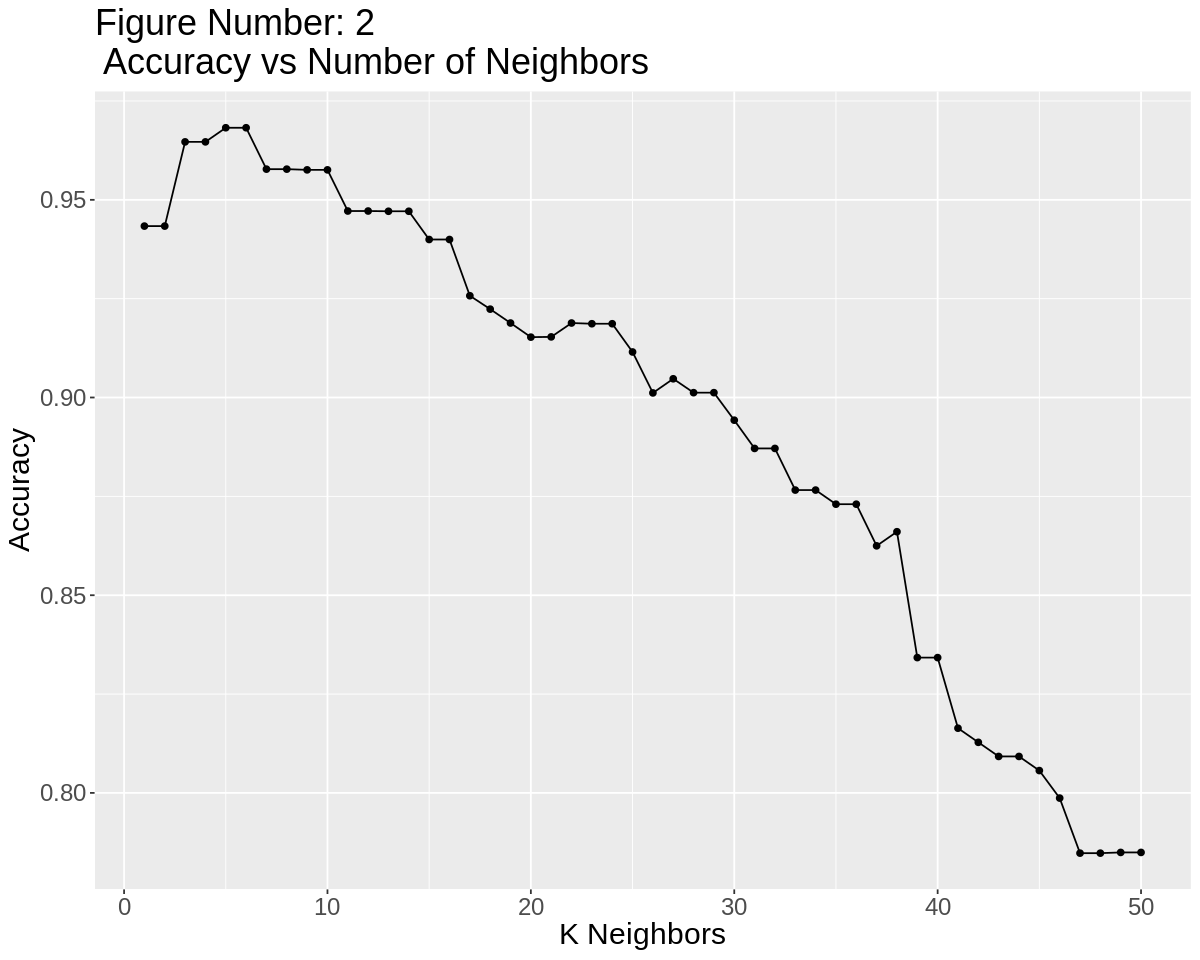

In [46]:
# We don't need to centre/scale any predictors since they are already in the range 0.0 to 1.0 (or we can say that they are all the same units)
options(repr.plot.height = 8, repr.plot.width = 10)

#Making the recipe with our predictor variables (LPR and PEG)
user_recipe <- recipe(UNS ~ LPR + PEG , user_data_training)

#Making the model using "straight-line" distance between points
#We keep the number of neighbors as tune() in order to get the optimised k value usign cross-validation
user_model <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
              set_engine("kknn") %>%
              set_mode("classification")

#We use 5 folds for cross-validation as we beilieve that it would not require a lot of time
user_vfold <- vfold_cv(user_data_training, v = 5, strata = UNS)

#We test 50 values of k
klots <-  tibble(neighbors = seq(from = 1, to = 50, by = 1))

#We put it all together in a workflow
user_metrics <- workflow() %>%
                add_recipe(user_recipe) %>% #adding the recipe
                add_model(user_model) %>% #adding the model
                tune_grid(resamples = user_vfold, grid = klots) %>% #using tune_grid as we use cross-validation
                collect_metrics() #collecting the metrics of our cross validation

#Using the metric fucntion to find the accuracy of our classifier
user_accuracy <- user_metrics %>% 
                 filter(.metric == "accuracy") #Filtering the column by "accuracy"

#Plotting the k values (number of neighbors) and the corresponding accuracy to get an optimized k value
cross_val_plot <- ggplot(user_accuracy, aes(x = neighbors, y = mean)) + 
                  geom_point() +
                  geom_line() +
                  labs(x = "K Neighbors", y = "Accuracy") +
                  ggtitle("Figure Number: 2 \n Accuracy vs Number of Neighbors") +
                  theme(text = element_text(size = 18))

cross_val_plot

From Figure Number:2, we see an evident peak at x=5, so we knew that k=5 has the highest probability of being the highest accuracy classifier, so then we make the model using this value as our number of neighbors.


So, we use the number of neighbors as 5 to build our model. We keep the recipe the same as before as we still want to use the same 2 predictors as before.  We put it all together in a workflow and then fit it to our training data set.

In [47]:
#Now that we know that k = 5 has the highest probability of being the highest accuracy classifier, we can make the model
user_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) %>%
             set_engine("kknn") %>%
             set_mode("classification")

user_fit <-  workflow() %>%
             add_recipe(user_recipe) %>% #adding the recipe to the workflow
             add_model(user_spec) %>% #adding the model to the workflow
             fit(data = user_data_training) #fitting the workflow to our training data

user_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~5, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.03521127
Best kernel: rectangular
Best k: 5

We then use the predict function to predict the classes of the testing data set and bind_cols to join the UNS class of the testing set to our predicted column to do a comparison between the two.

In [48]:
#Now that we have the model set up, we can predict the UNS class
user_predictions <- predict(user_fit, user_data_test) %>% 
                     bind_cols(user_data_test) #adding the test data columns to our predicted column in order to see our classifier accuracy

#We use the metrics functions on the table which contains the predicted column along with the actual column to see our classsifier accuracy
user_metrics <- user_predictions %>%
                metrics(truth = UNS, estimate = .pred_class) %>%
                filter(.metric == "accuracy")

#We make a confusion matrix to see which classes in particular have been predicted incorrectly and whether we can afford these errors (false negatives and/or postitives) or not
user_conf <- user_predictions %>%
             conf_mat(truth = UNS, estimate = .pred_class)

print("Table Number: 7")
user_metrics
print("Table Number: 8")
user_conf

[1] "Table Number: 7"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9579832


[1] "Table Number: 8"


          Truth
Prediction Very Low High Low Middle
  Very Low       13    0   0      0
  High            0   29   0      0
  Low             2    0  38      2
  Middle          0    1   0     34

In Table Number: 7, we filter the collected metrics by "accuracy" and observe that the accuracy of our classifier is 95.7%.

To further analyse the classifer accuracy, we used conf_mat to make a confusion matrix (Table Number: 8) o. It helped us to see which observations have been predicted wrong and what were the correct classes of those observations. Table Number: 8 shows that the only wrong prediction that our classifier made, actually weren’t that bad because when the truth value was ‘Very Low’, our classifier predicted “Low”, when the truth was ‘Middle’, our classifier predicted ‘Low’ and when the truth was “High”, our classifier predicted “Middle”, which is actually just one class level up or down which we believe is really not that bad and can be dealt with easily.

In [49]:
#Calculating the accuracy of the majority classifier 
user_proportions <- user_data_training %>%
                    group_by(UNS) %>% # Grouping by the UNS column
                    summarize(n = n()) %>% #counting the number of each class
                    mutate(percent = 100*n/nrow(user_data_training)) #finding the percentage of each class in our data set

print("Table Number: 9")
user_proportions

`summarise()` ungrouping output (override with `.groups` argument)



[1] "Table Number: 9"


UNS,n,percent
<fct>,<int>,<dbl>
Very Low,35,12.32394
High,72,25.35211
Low,91,32.04225
Middle,86,30.28169


We also check the accuracy of our majority classifier (by using group_by(UNS) and summarize to calculate the number of rows in each group and dividing by total number of rows (nrows))  to further see the quality of our classifier (Table Number: 9). Since the accuracy of the majority classifier is 32% which is 3 times less than the accuracy of our classifier, we infer that our classifier's accuracy is pretty good.

Finally, we make a plot to visualize the accuracy of our classifier by shading the area of the graph with the color of the predicted class and color the data points with their correct class so that we can visually see which data points lie in the correct shaded color (predicted correctly) and which do not (predicted incorrectly).

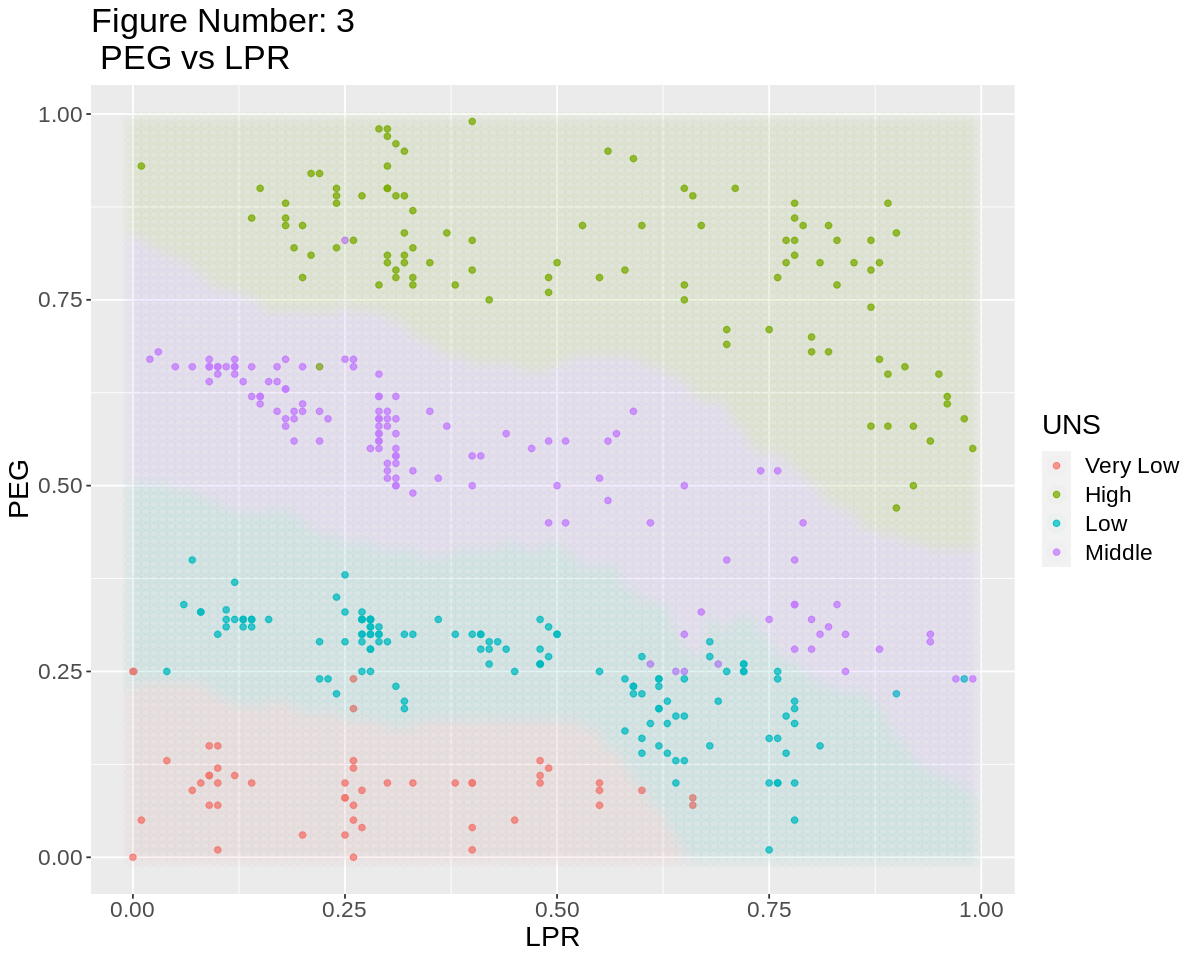

In [50]:
#Making a final plot of our classsifer which colours our classifier predictions by area

# create the grid of LPR/PEG vals, and arrange in a data frame
are_grid <- seq(min(total$LPR), 
                max(total$LPR), 
                length.out = 100)
smo_grid <- seq(min(total$PEG), 
                max(total$PEG), 
                length.out = 100)
asgrid <- as_tibble(expand.grid(LPR = are_grid, 
                                PEG = smo_grid))

# use the fit workflow to make predictions at the grid points
knnPredGrid <- predict(user_fit, asgrid)

# bind the predictions as a new column with the grid points
prediction_table <- bind_cols(knnPredGrid, asgrid) %>% 
                    rename(Class = .pred_class)

#making the decided plot
plot <- ggplot() +
              geom_point(data = total, 
              mapping = aes(x = LPR, 
                            y = PEG,
                            color = UNS), 
              alpha = 0.75) +
              geom_point(data = prediction_table, 
              mapping = aes(x = LPR, 
                            y = PEG,
                            color = Class), 
              alpha = 0.02, 
              size = 5) +
              labs(color = "UNS", 
              x = "LPR", 
              y = "PEG") +
              ggtitle("Figure Number: 3 \n PEG vs LPR") +
              theme(text = element_text(size = 17))

plot

From the plot, we observe that there are barely a few points which lie outside their right colour (the correct predicted colour) which further emphasises the good quality of our classifier. We also observe that as the values of both our predictor variables increases, the level of UNS class also increases (Very Low < Low < Middle < High (in terms of User Knowldege Level)).

### Discussion

To summarise, our classifier accuracy is 95.7%, which is 3 times as that of the majority classifier, and the confusion matrix does not show any serious false positives or negatives. Hence, we believe that the accuracy of our classifier is good enough to make any future predictions and any inference drawn from it can be trusted. Our final plot re-emphasises the good quality of the classifier by showing all the correct/ incorrect predictions visually.

We expected to find that the higher the scores across all factors, and the more even the  distribution, the higher the overall knowledge. As seen from our final plot, we found that as both our predictor variables increased the class of the knowledge level of the user increased as well which is what we expected to find as well. The only difference was that instead of getting this result using 5 predictors, we got this by only using 2 of them.  

These findings could be used to disprove the notion that test scores do not accurately reflect the user's knowledge level. As shown through our analysis, higher test scores almost always correlate with higher knowledge level.  

Some future questions this could lead to is:   

Can study techniques be standardized across all participants? 
Or does everyone who has slightly different study needs to obtain the same high score? (ex. some require lower levels of study time and repetition, some require more to obtain the exact same test result and knowledge level) ? 
If this is the case, overall knowledge should not be standardized. Are there better ways to evaluate overall knowledge (such as solely on exam performances)?

### References   
General Knowledge Monitoring as a Predictor of in‐Class ... https://bpspsychub.onlinelibrary.wiley.com/doi/abs/10.1111/j.2044-8279.2011.02038.x.  
Unfolding case study effectiveness on nursing students' level…
https://www.proquest.com/docview/1760560430?accountid=14656&pq-origsite=summon  
“Apa PsycNet.” American Psychological Association, American Psychological Association, https://psycnet.apa.org/record/2002-01666-008?doi=1   
Tiffany Timbers, Trevor Campbell. “Data Science.” Data Science, 2 Mar. 2022, datasciencebook.ca/.   
Citation used : MLA8.

